In [ ]:
import neurodynex3.ojas_rule.oja as oja

Imagine a neuron receiving signals from the retina:

If the inputs are light intensities from different parts of the visual field, and there is a consistent edge in the image, the variance will be highest along the direction where light intensity changes from dark to light.
Oja’s Rule will adjust the weights toward detecting that edge direction because it carries meaningful visual information.

In [2]:
cloud = oja.make_cloud()  # generate data points
wcourse = oja.learn(cloud)  # learn weights and return timecourse

9.1.1: The norm of weights

learning rate eta = 0.2

The final weight vector w is: (0.45035655203185776,0.9011697204499586)


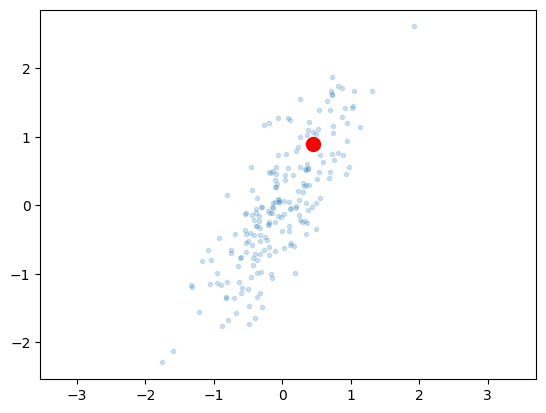

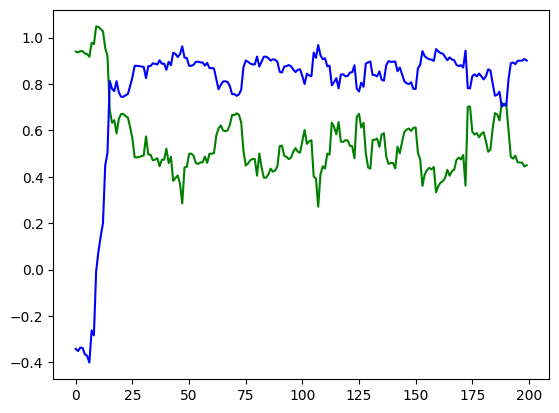

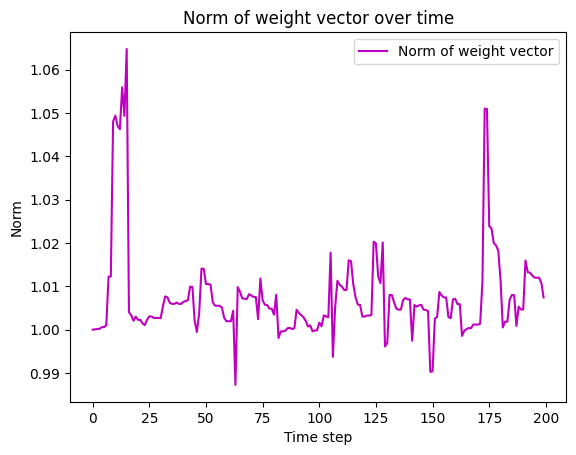

In [2]:
%matplotlib inline  
import neurodynex3.ojas_rule.oja as oja
import matplotlib.pyplot as plt

cloud = oja.make_cloud(n=200, ratio=.3, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.2)
plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')
plt.figure()
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")

print("The final weight vector w is: ({},{})".format(wcourse[-1,0],wcourse[-1,1]))

weight_norm = np.linalg.norm(wcourse, axis=1)

plt.figure()
plt.plot(weight_norm, "m", label="Norm of weight vector")
plt.xlabel("Time step")
plt.ylabel("Norm")
plt.title("Norm of weight vector over time")
plt.legend()



9.2 circular data
ratio = 1
(no angle specified: random angle) 

circular data cloud has no preferred direction. This means that the weight vector is initialized randomly. The final weight vector will have a fixed norm but will point in the same direction as it was initialized, since the data has no preference.
The norm of the weight vector measures its length or magnitude in mathematical terms. 
A smaller 𝜂 would slow learning, potentially making the outcome more stable but slower to converge. learning rate eta affects how much each data point influences the weights. 

The final weight vector w is: (-0.13, 0.88)


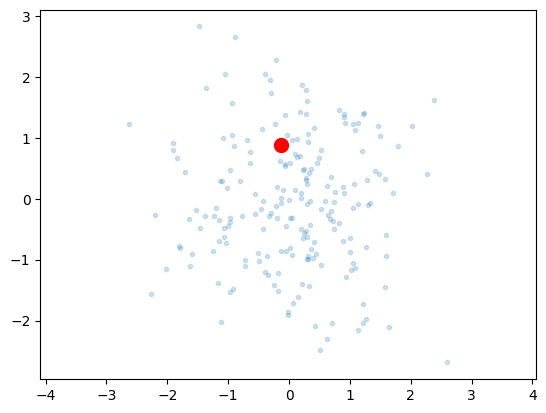

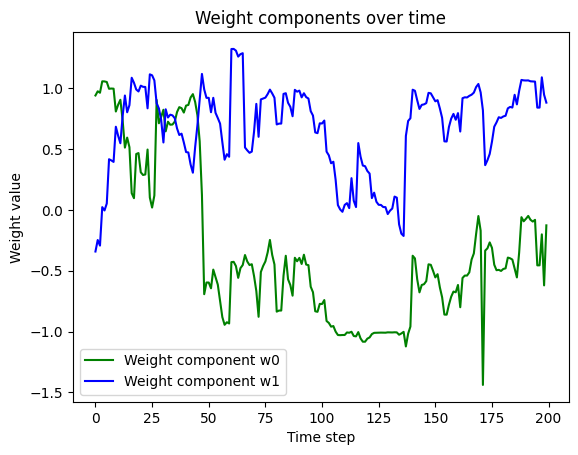

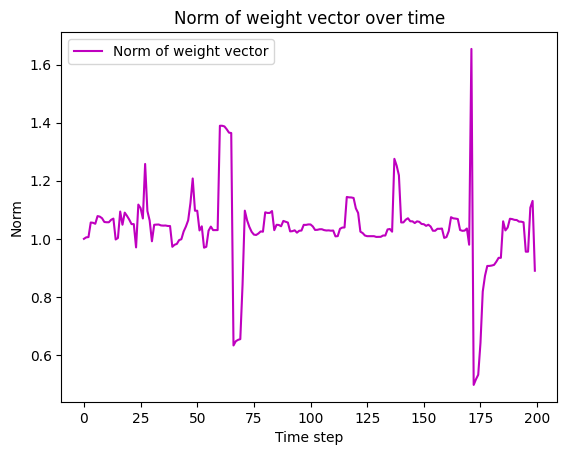

In [18]:
# %matplotlib inline
import neurodynex3.ojas_rule.oja as oja
import matplotlib.pyplot as plt
import numpy as np

cloud = oja.make_cloud(n=200, ratio=1, angle = 0)

wcourse = oja.learn(cloud, initial_angle=-20, eta=0.2)

plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')

plt.figure()
plt.plot(wcourse[:, 0], "g", label="Weight component w0")
plt.plot(wcourse[:, 1], "b", label="Weight component w1")
plt.legend()
plt.xlabel("Time step")
plt.ylabel("Weight value")
plt.title("Weight components over time")

weight_norm = np.linalg.norm(wcourse, axis=1)

plt.figure()
plt.plot(weight_norm, "m", label="Norm of weight vector")
plt.xlabel("Time step")
plt.ylabel("Norm")
plt.title("Norm of weight vector over time")
plt.legend()

print("The final weight vector w is: ({:.2f}, {:.2f})".format(wcourse[-1, 0], wcourse[-1, 1]))


9.3 What is the neuron learning?
elliptical data cloud: ratio = 0.3

The final weight vector w is: (0.51, 0.86)
The final weight vector is: (0.5061525393270551, 0.8626955757512382)
The input vector that maximizes firing (normalized): [0.50604273 0.86250841]


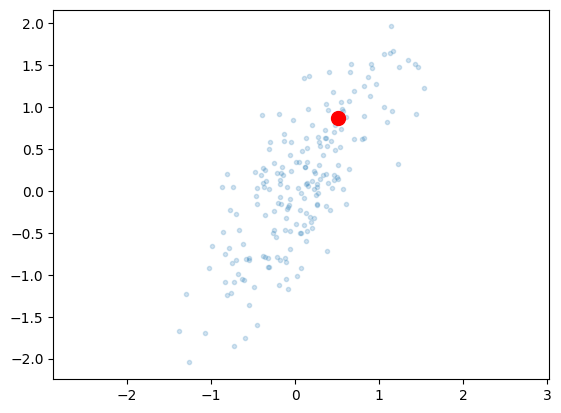

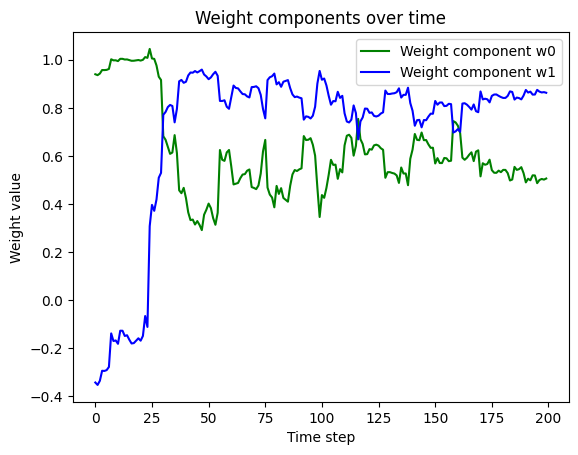

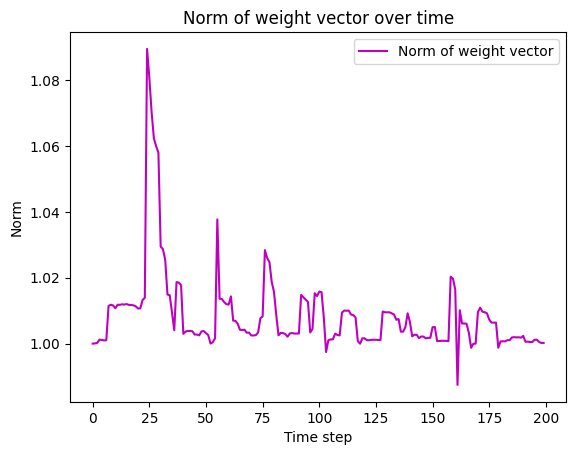

In [23]:
# %matplotlib inline
import neurodynex3.ojas_rule.oja as oja
import matplotlib.pyplot as plt
import numpy as np

cloud = oja.make_cloud(n=200, ratio=0.3, angle=60)

wcourse = oja.learn(cloud, initial_angle=-20, eta=0.2)

plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')

plt.figure()
plt.plot(wcourse[:, 0], "g", label="Weight component w0")
plt.plot(wcourse[:, 1], "b", label="Weight component w1")
plt.legend()
plt.xlabel("Time step")
plt.ylabel("Weight value")
plt.title("Weight components over time")

weight_norm = np.linalg.norm(wcourse, axis=1)

plt.figure()
plt.plot(weight_norm, "m", label="Norm of weight vector")
plt.xlabel("Time step")
plt.ylabel("Norm")
plt.title("Norm of weight vector over time")
plt.legend()

print("The final weight vector w is: ({:.2f}, {:.2f})".format(wcourse[-1, 0], wcourse[-1, 1]))


# Extract final weights
final_w = (wcourse[-1, 0], wcourse[-1, 1])
norm_w = np.linalg.norm(final_w)

# Calculate the input vector that maximizes firing
max_firing_input = final_w / norm_w

# Print results
print(f"The final weight vector is: {final_w}")
print(f"The input vector that maximizes firing (normalized): {max_firing_input}")


After learning with **Oja's Rule**, the output represents the **projection** of the input vector onto the learned weight vector, which aligns with the **principal eigenvector** of the input data's covariance matrix. This means:

- **Variance Maximization:** The output reflects the input's alignment with the direction of **maximum variance**.  
- **Data Compression:** The neuron extracts the most significant feature of the input, reducing dimensionality.  
- **Signal Detection:** A high \( y \) indicates strong alignment with the learned direction, while a low or zero \( y \) means little alignment.  

In essence, \( y \) summarizes how much the input contains the **most important feature** learned during training.


Weight course shape: (1000, 2)
[[ 0.93969262 -0.34202014]
 [ 0.97570776 -0.24306936]
 [ 0.9940185  -0.16503801]
 ...
 [ 0.67854841  0.73768126]
 [ 0.69103644  0.7246874 ]
 [ 0.6828995   0.73144641]]
The final weight vector w is: (0.68, 0.73)
The final weight vector is: (0.6828995031354477, 0.7314464087537892)
The input vector that maximizes firing (normalized): [0.6824337 0.7309475]


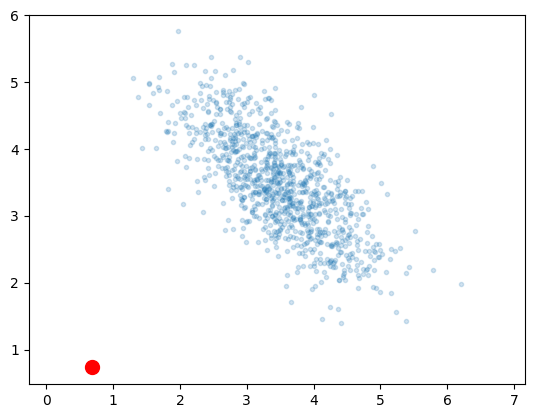

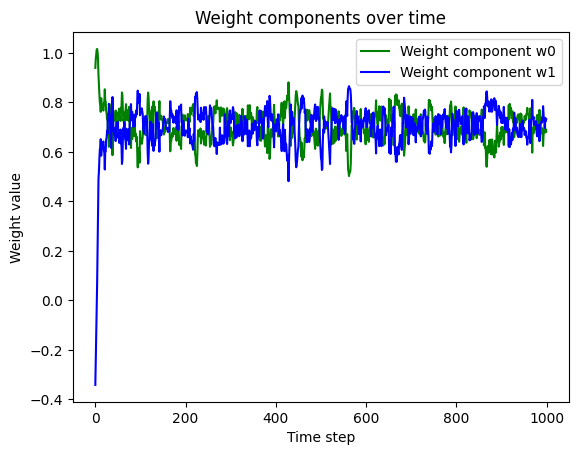

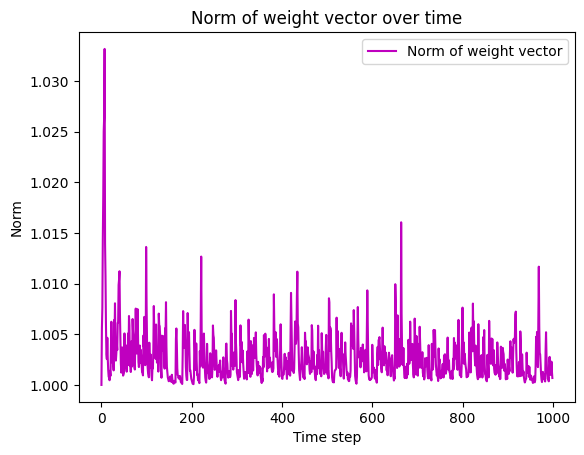

In [37]:
# %matplotlib inline
import neurodynex3.ojas_rule.oja as oja
import matplotlib.pyplot as plt
import numpy as np

cloud = oja.make_cloud(n=1000, ratio=.4, angle=-45) + np.array([3.5, 3.5])


wcourse = oja.learn(cloud, initial_angle=-20, eta=0.01)

print("Weight course shape:", wcourse.shape)
print(wcourse)

plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')

plt.figure()
plt.plot(wcourse[:, 0], "g", label="Weight component w0")
plt.plot(wcourse[:, 1], "b", label="Weight component w1")
plt.legend()
plt.xlabel("Time step")
plt.ylabel("Weight value")
plt.title("Weight components over time")

weight_norm = np.linalg.norm(wcourse, axis=1)

plt.figure()
plt.plot(weight_norm, "m", label="Norm of weight vector")
plt.xlabel("Time step")
plt.ylabel("Norm")
plt.title("Norm of weight vector over time")
plt.legend()

print("The final weight vector w is: ({:.2f}, {:.2f})".format(wcourse[-1, 0], wcourse[-1, 1]))


# Extract final weights
final_w = (wcourse[-1, 0], wcourse[-1, 1])
norm_w = np.linalg.norm(final_w)

# Calculate the input vector that maximizes firing
max_firing_input = final_w / norm_w

# Print results
print(f"The final weight vector is: {final_w}")
print(f"The input vector that maximizes firing (normalized): {max_firing_input}")


The simplest and most effective solution is preprocessing the data by centering it around zero. This aligns the data with the assumptions of Oja's rule and ensures the weights remain within the cloud. If preprocessing isn't an option (e.g., in online learning scenarios), consider adding bias correction dynamically in the learning rule.

Weight course shape: (1000, 2)
[[ 0.93969262 -0.34202014]
 [ 0.98565884 -0.21572898]
 [ 1.00063361 -0.14521783]
 ...
 [ 0.71591825  0.69962487]
 [ 0.68045217  0.7351926 ]
 [ 0.66956543  0.74388735]]
The final weight vector w is: (0.67, 0.74)
The final weight vector is: (0.669565427653345, 0.7438873501993432)
The input vector that maximizes firing (normalized): [0.66900161 0.74326095]


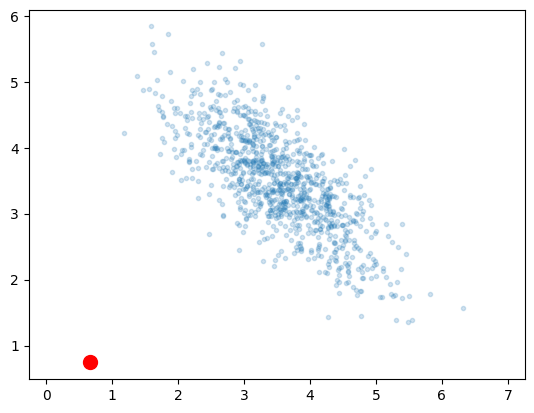

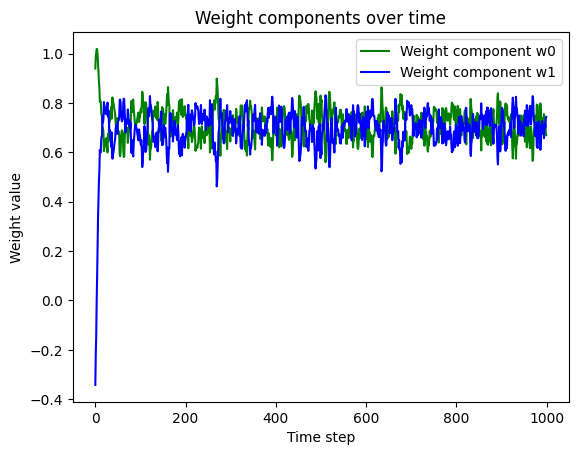

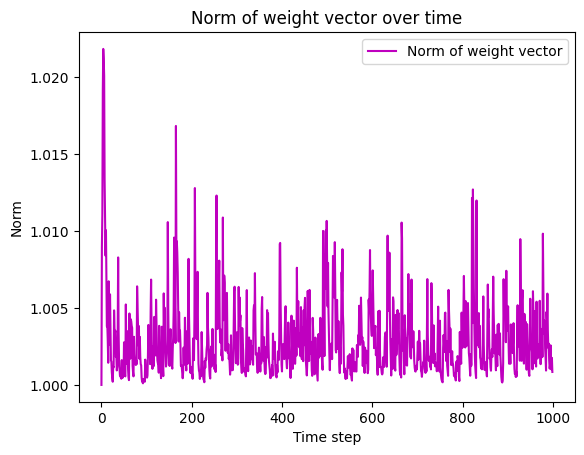

In [42]:





# %matplotlib inline
import neurodynex3.ojas_rule.oja as oja
import matplotlib.pyplot as plt
import numpy as np

cloud = oja.make_cloud(n=1000, ratio=.4, angle=-45) + np.array([3.5, 3.5])

wcourse = oja.learn(cloud, initial_angle=-20, eta=0.01)

print("Weight course shape:", wcourse.shape)
print(wcourse)

plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')

plt.figure()
plt.plot(wcourse[:, 0], "g", label="Weight component w0")
plt.plot(wcourse[:, 1], "b", label="Weight component w1")
plt.legend()
plt.xlabel("Time step")
plt.ylabel("Weight value")
plt.title("Weight components over time")

weight_norm = np.linalg.norm(wcourse, axis=1)

plt.figure()
plt.plot(weight_norm, "m", label="Norm of weight vector")
plt.xlabel("Time step")
plt.ylabel("Norm")
plt.title("Norm of weight vector over time")
plt.legend()

print("The final weight vector w is: ({:.2f}, {:.2f})".format(wcourse[-1, 0], wcourse[-1, 1]))


# Extract final weights
final_w = (wcourse[-1, 0], wcourse[-1, 1])
norm_w = np.linalg.norm(final_w)

# Calculate the input vector that maximizes firing
max_firing_input = final_w / norm_w

# Print results
print(f"The final weight vector is: {final_w}")
print(f"The input vector that maximizes firing (normalized): {max_firing_input}")


Weight course shape: (1000, 2)
[[ 0.93969262 -0.34202014]
 [ 0.90908032 -0.42612674]
 [ 0.90375611 -0.43713953]
 ...
 [ 0.90908343 -0.4143107 ]
 [ 0.91206757 -0.40780536]
 [ 0.86597364 -0.5116637 ]]
The final weight vector w is: (0.87, -0.51)
The final weight vector is: (0.8659736438959276, -0.5116636968411943)
The input vector that maximizes firing (normalized): [ 0.86094743 -0.50869394]


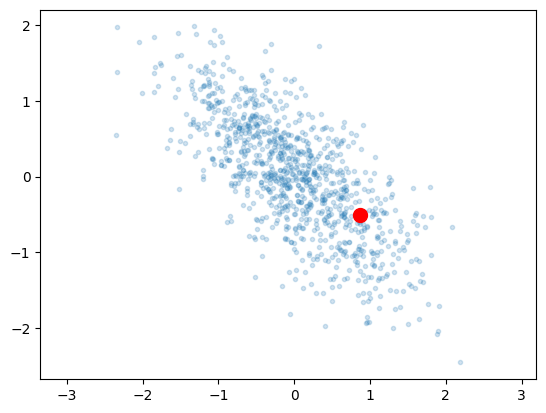

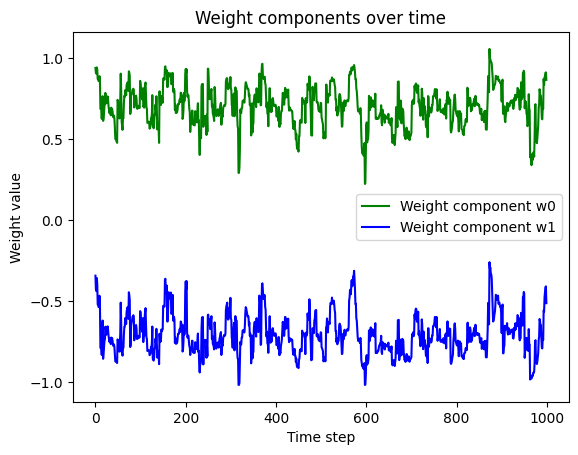

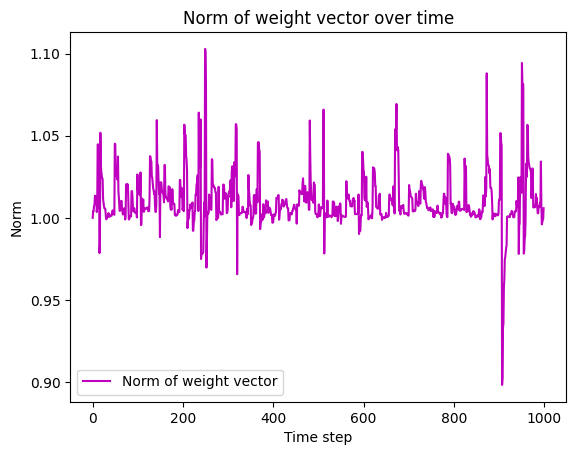

In [43]:
# %matplotlib inline
import neurodynex3.ojas_rule.oja as oja
import matplotlib.pyplot as plt
import numpy as np

cloud = oja.make_cloud(n=1000, ratio=.4, angle=-45) + np.array([3.5, 3.5])

# Center the data cloud
mean_cloud = np.mean(cloud, axis=0)
cloud_centered = cloud - mean_cloud

# Apply Oja's rule on the centered cloud
wcourse = oja.learn(cloud_centered, initial_angle=-20, eta=0.2)


print("Weight course shape:", wcourse.shape)
print(wcourse)

plt.scatter(cloud_centered[:, 0], cloud_centered[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')

plt.figure()
plt.plot(wcourse[:, 0], "g", label="Weight component w0")
plt.plot(wcourse[:, 1], "b", label="Weight component w1")
plt.legend()
plt.xlabel("Time step")
plt.ylabel("Weight value")
plt.title("Weight components over time")

weight_norm = np.linalg.norm(wcourse, axis=1)

plt.figure()
plt.plot(weight_norm, "m", label="Norm of weight vector")
plt.xlabel("Time step")
plt.ylabel("Norm")
plt.title("Norm of weight vector over time")
plt.legend()

print("The final weight vector w is: ({:.2f}, {:.2f})".format(wcourse[-1, 0], wcourse[-1, 1]))


# Extract final weights
final_w = (wcourse[-1, 0], wcourse[-1, 1])
norm_w = np.linalg.norm(final_w)

# Calculate the input vector that maximizes firing
max_firing_input = final_w / norm_w

# Print results
print(f"The final weight vector is: {final_w}")
print(f"The input vector that maximizes firing (normalized): {max_firing_input}")
